In [20]:
%run utils.ipynb

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#import seaborn as sns
#import sklearn.datasets as skldata
#import scipy.special as scspec
#import scipy as sp
#import scipy.optimize
#import types
#from sup_funcs import backtracking, get_x_y_from_callback

In [22]:
X, y = make_blobs(n_samples=100, centers=2, n_features=3,
                  random_state=0)

In [23]:
N, dim = X.shape
Xones = (np.insert(X.T, 0, np.ones(N, dtype=np.intc)).reshape(dim+1, N)).T

withoutCompression = GradientDescent(gradf, np.zeros(dim + 1), Xones, y)
withTopK = GradientDescent(
    gradf, np.zeros(dim + 1), Xones, y, compression=lambda x: topK(x, (dim + 1) // 2)
)
withSmartCompression = SmartGradientDescent(
    gradf, np.zeros(dim + 1), Xones, y, (dim + 1) // 2
)


/var/folders/z5/jmyhqr355xq_jskwvzr8yr51wp6lt2/T/ipykernel_79727/2255059793.py:14: RuntimeWarning: divide by zero encountered in log
  res += y[i] * np.log(sigma(theta @ X[i].T)) + (1 - y[i]) * np.log(1 - sigma(theta @ X[i].T))
/var/folders/z5/jmyhqr355xq_jskwvzr8yr51wp6lt2/T/ipykernel_79727/2255059793.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  res += y[i] * np.log(sigma(theta @ X[i].T)) + (1 - y[i]) * np.log(1 - sigma(theta @ X[i].T))


In [24]:
print(withoutCompression['num_iter'], withTopK['num_iter'], withSmartCompression['num_iter'])
print(withoutCompression['tol'], withTopK['tol'], withSmartCompression['tol'])

3108 3646 6212
0.009998202291615264 0.008302199285276379 0.007051429244679249


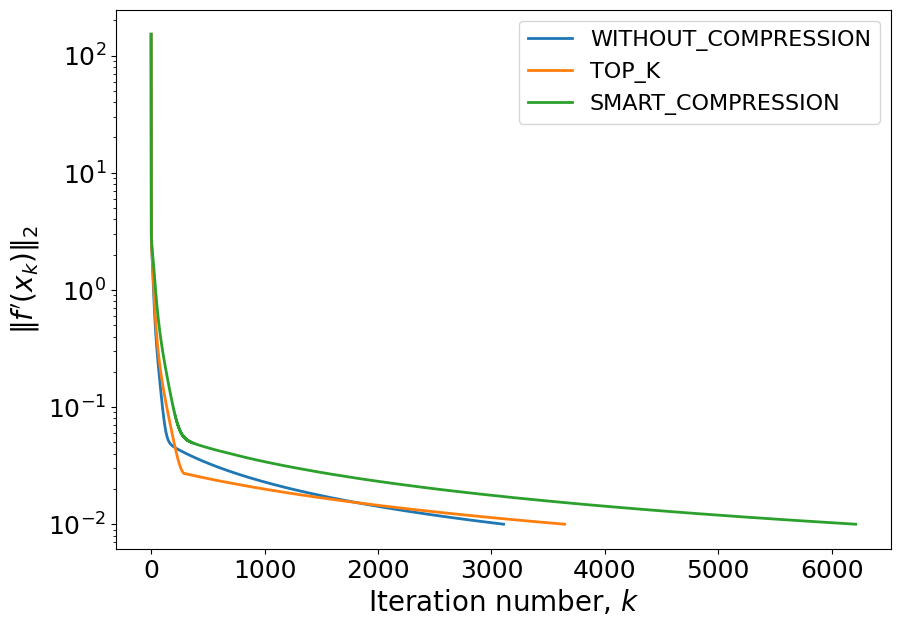

In [25]:
plt.figure(figsize=(10, 7))
plt.semilogy(
    [grad_norm for grad_norm in withoutCompression['gradients']],
    label=r"WITHOUT_COMPRESSION",
    linewidth=2
)
plt.semilogy(
    [grad_norm for grad_norm in withTopK['gradients']],
    label=r"TOP_K",
    linewidth=2
)
plt.semilogy(
    [grad_norm for grad_norm in withSmartCompression['gradients']],
    label=r"SMART_COMPRESSION",
    linewidth=2
)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

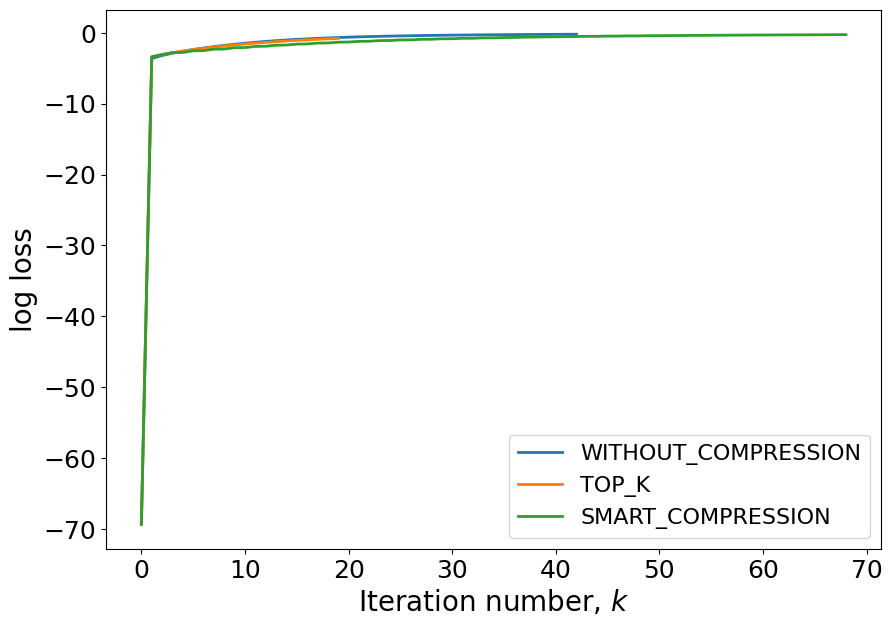

In [27]:
plt.figure(figsize=(10, 7))
plt.plot(
    [loss for loss in withoutCompression['loss']],
    label=r"WITHOUT_COMPRESSION",
    linewidth=2
)
plt.plot(
    [loss for loss in withTopK['loss']],
    label=r"TOP_K",
    linewidth=2
)
plt.plot(
    [loss for loss in withSmartCompression['loss']],
    label=r"SMART_COMPRESSION",
    linewidth=2
)
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel(r"log loss", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)